In [128]:
###############
### IMPORTS ###
###############

import random
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np

In [124]:
#################
### FUNCTIONS ###
#################

def initialization(n):
    sequence = random.sample(range(n),n)
    return sequence

def investigate(sequence,prisoner, guesses):
    count = 0
    ticket = sequence[prisoner]
    while ticket != prisoner:
        ticket = sequence[ticket]
        count += 1
    if count <= guesses:
        return (1,count)
    else:
        return (0,count)

def single(sequence,guesses):
    prisoners = set(range(len(sequence)))
    did_find_ticket = list()
    counts = list()
    while prisoners:
        prisoner = prisoners.pop()
        result = investigate(sequence,prisoner,guesses)
        did_find_ticket.append(result[0])
        counts.append(result[1])
    return did_find_ticket, counts

def many(runs,number_of_prisoners,guesses):
    total_counts = list()
    hits = list()
    for i in range(runs):
        sequence = initialization(number_of_prisoners)
        did_find_ticket, counts = single(sequence,guesses)
        if did_find_ticket.count(1)/len(did_find_ticket) == 1:
            hits.append(1)
            total_counts += counts
        else:
            hits.append(0)
    return hits, total_counts

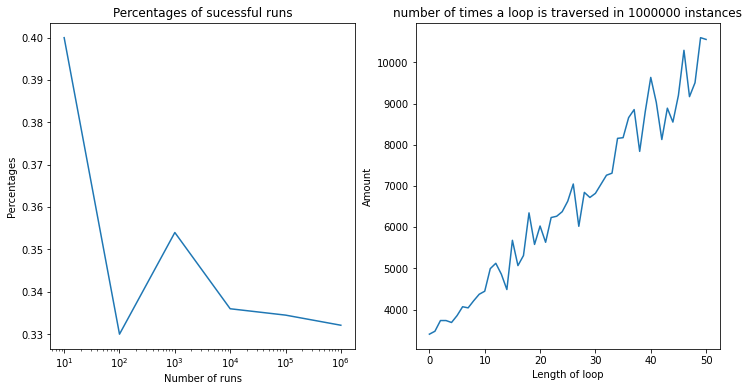

In [154]:
number_of_prisoners = 100
runs = 10000
guesses = number_of_prisoners*0.5
run_list = [10,100,1000,10000,100000,1000000]
percentages = list()
for run in run_list:
    percentages.append(mean(many(run,number_of_prisoners,guesses)[0]))

hits, total_counts = many(runs,number_of_prisoners,guesses)
values, counts = np.unique(total_counts, return_counts=True)

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].set_xscale('log')
ax[0].plot(run_list,percentages)
ax[0].set(xlabel = 'Number of runs', ylabel = 'Percentages', title = 'Percentages of sucessful runs');
ax[1].plot(values, counts)
ax[1].set(xlabel = 'Length of loop', ylabel = 'Amount', title = f'number of times a loop is traversed in {runs*number_of_prisoners} instances');
